In [ ]:
#pip install pandas_datareader


In [43]:
# This code will filter out all the warnings
import warnings
warnings.filterwarnings('ignore')

### Import the Necessary Libraries

In [44]:
import pandas_datareader as web
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import date


### Import data using pandas_datareader. Select data range of your choice

In [45]:
df=web.DataReader('GOOGL',data_source='yahoo',start='2012-01-01',end='2021-02-28')

## Basic EDA

In [46]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345647.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722272.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559234.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380414.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633555.0,311.541534


In [47]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-22,2080.330078,2048.000000,2053.600098,2054.260010,1473300.0,2054.260010
2021-02-23,2072.500000,1990.229980,2013.989990,2060.120117,1732900.0,2060.120117
2021-02-24,2088.320068,2027.530029,2030.040039,2083.810059,1130400.0,2083.810059
2021-02-25,2083.000000,2006.489990,2055.929932,2015.949951,2077400.0,2015.949951
2021-02-26,2056.520020,2001.010010,2029.949951,2021.910034,2001500.0,2021.910034


In [48]:
df.shape

(2303, 6)

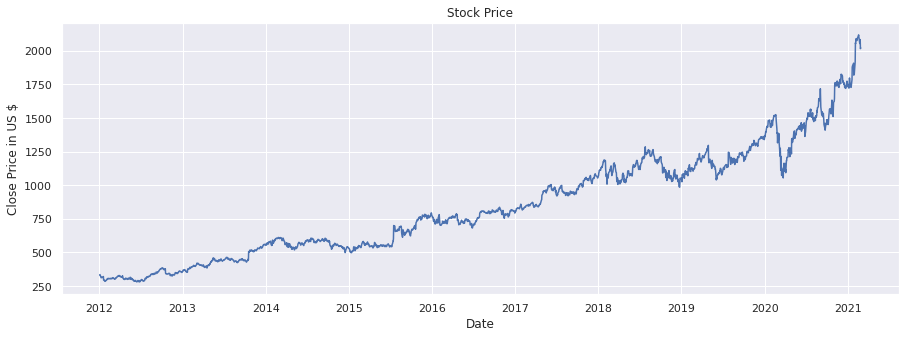

In [49]:
plt.figure(figsize=(15,5))
plt.plot(df.Close)
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price in US $");


## Seperate out the Close Column as we will be working on the Closing Values

In [50]:
close=df.filter(['Close'])

In [51]:
close.head()

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534


In [52]:
# change the Values to Numpy Array
close_stock=close.values

In [53]:
type(close_stock)

numpy.ndarray

## Prepare & Scale  the Training Data

In [54]:
training_data_length=math.ceil(len(close_stock)*0.8)

In [55]:
training_data_length

1843

In [56]:
mms=MinMaxScaler(feature_range=(0, 1))

In [57]:
scaled_close_stock=mms.fit_transform(close_stock)

In [58]:
training_data=scaled_close_stock[0:training_data_length,:]

In [59]:
len(training_data)

1843

In [60]:
training_data

array([[0.02894973],
       [0.02973092],
       [0.02720775],
       ...,
       [0.55274455],
       [0.49986268],
       [0.48591891]])

### Make X_train & y_train

In [61]:
X_train=[]
y_train=[]

In [62]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

### Change X_train and y_train to NumPy arrays

In [63]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [64]:
print(type(X_train))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [65]:
print(X_train.ndim)
print(X_train.shape)

2
(1783, 60)


In [66]:
X_train[:1]

array([[0.02894973, 0.02973092, 0.02720775, 0.02476079, 0.01725933,
        0.01744443, 0.01821199, 0.01921363, 0.01794796, 0.01892512,
        0.02010368, 0.02191644, 0.0073327 , 0.00720476, 0.00595544,
        0.00284162, 0.00246328, 0.00569685, 0.00507355, 0.00573224,
        0.00592822, 0.00709317, 0.01014711, 0.01362021, 0.01298873,
        0.01382706, 0.01426529, 0.01275466, 0.0144667 , 0.01380257,
        0.01265938, 0.01292069, 0.01240897, 0.01495664, 0.01330718,
        0.01280909, 0.01384067, 0.01368009, 0.01615154, 0.01611344,
        0.017243  , 0.01693   , 0.01502469, 0.01249607, 0.0129969 ,
        0.01308944, 0.01121407, 0.01254778, 0.0159855 , 0.0154983 ,
        0.01689733, 0.01796157, 0.02039493, 0.02026156, 0.02202804,
        0.02368022, 0.02273844, 0.02457298, 0.02394423, 0.02632315]])

In [67]:
X_train[:1].shape

(1, 60)

### RNN needs data in 3 dimensions , number of Samples, Number of Time Steps and Number of Features So wee need to reshape the data

In [68]:
print(X_train.shape)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

(1783, 60)


In [69]:
X_train.shape

(1783, 60, 1)

# Make the LSTM Architecture

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [71]:
model = Sequential()

In [72]:
X_train.shape

(1783, 60, 1)

In [74]:
X_train.shape[1]

60

### input_shape = number of time steps and number of features. In this case number of features is 1

In [40]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))


In [41]:
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
56/56 [==============================] - 36s 14ms/step - loss: 0.0141
Epoch 2/50
56/56 [==============================] - 1s 11ms/step - loss: 3.9336e-04
Epoch 3/50
56/56 [==============================] - 1s 11ms/step - loss: 3.2768e-04
Epoch 4/50
56/56 [==============================] - 1s 11ms/step - loss: 3.3713e-04
Epoch 5/50
56/56 [==============================] - 1s 13ms/step - loss: 3.0550e-04
Epoch 6/50
56/56 [==============================] - 1s 12ms/step - loss: 3.1445e-04
Epoch 7/50
56/56 [==============================] - 1s 11ms/step - loss: 3.1004e-04
Epoch 8/50
56/56 [==============================] - 1s 12ms/step - loss: 3.0697e-04
Epoch 9/50
56/56 [==============================] - 1s 12ms/step - loss: 3.2794e-04
Epoch 10/50
56/56 [==============================] - 1s 12ms/step - loss: 2.5830e-04
Epoch 11/50
56/56 [==============================] - 1s 13ms/step - loss: 2.6568e-04
Epoch 12/50
56/56 [==============================] - 1s 12ms/step - loss: 2.5

## Prepare & reshape the Test Data

In [43]:
test_data=scaled_close_stock[training_data_length-60:,:]


In [44]:
training_data_length

1843

In [45]:
len(test_data)

520

In [46]:
X_test=[]
y_test=close_stock[training_data_length:,:]

In [47]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [48]:
len(X_test)

460

In [49]:
X_test=np.array(X_test)

In [50]:
X_test.shape

(460, 60)

In [51]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Make Predictions

In [52]:
y_pred=model.predict(X_test)


In [53]:
y_pred=mms.inverse_transform(y_pred)

In [54]:
pd.DataFrame(y_pred)

,0
0,1161.545776
1,1156.115112
2,1181.004517
3,1194.328247
4,1183.828369
...,...
455,1972.325195
456,1941.586670
457,1959.933350
458,1982.059937


## Plot the Data

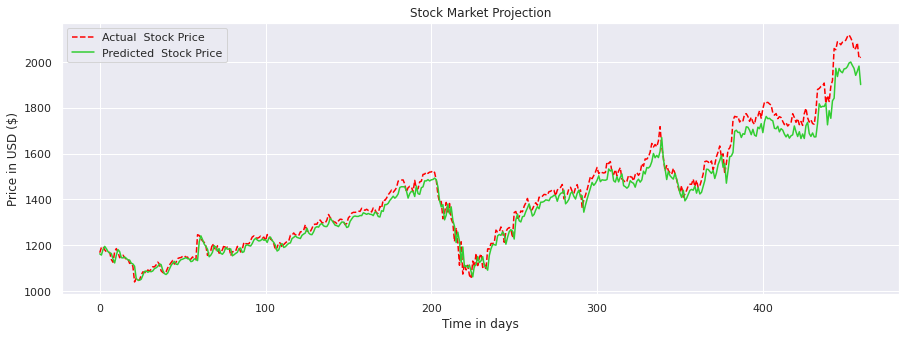

In [55]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual  Stock Price',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Stock Price',ls='-')
plt.title('Stock Market Projection')
plt.xlabel('Time in days')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.show()

## Plot the whole Data Training, Testing and Prediction Data together

In [56]:
train=close[:training_data_length]
test=close[training_data_length:]
test['pred']=y_pred

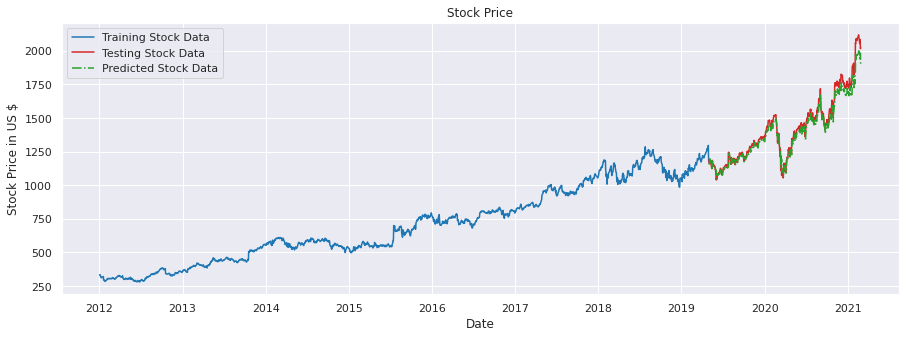

In [57]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'], color = 'tab:blue', label = 'Training Stock Data',ls='-')
plt.plot(test['Close'], color = 'tab:red', label = 'Testing Stock Data',ls='-')
plt.plot(test['pred'], color = 'tab:green', label = 'Predicted Stock Data',ls='dashdot')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price in US $')
plt.legend()
plt.show()